In [0]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

train = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
for col_name in train.columns:
    if(train[col_name].dtype != 'int64'):
        train[col_name] = train[col_name].astype('category')
        train[col_name] = train[col_name].cat.codes
train = train.iloc[:,1:].values
print(train.shape)

train_labels = train_labels.iloc[:,1:].values
train_labels = train_labels-1
X_train,X_test,Y_train,Y_test = train_test_split(train, train_labels, test_size=0.10, random_state=42)

(260601, 38)


In [0]:
from sklearn.metrics import f1_score
results = []


depths = range(3, 26, 2)
for depth in depths:
    clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=4, random_state=42, max_depth=depth)
    clf.fit(X_train, Y_train)

    predtest = clf.predict(X_test)


    f1_test_w = f1_score(Y_test, predtest, average='weighted')

    print(depth, f1_test_w)
    results.append(f1_test_w)




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3 0.6528661611330127
5 0.6803691085721604
7 0.6986530978598395
9 0.715687077965974
11 0.7256911401453155
13 0.7339209676135977
15 0.7341196391731655
17 0.7345250323523669
19 0.7329191612463368
21 0.7288755852441918
23 0.7286032869842046
25 0.7269707854520194


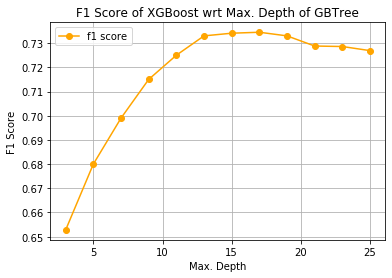

In [10]:
results = [0.6528, 0.68, 0.699, 0.715, 0.725, 0.733, 0.7341, 0.7345, 0.733, 0.7288, 0.7286, 0.7269]
import matplotlib.pyplot as plt
plt.plot(range(3, 26, 2), results, '-o', color='orange', label='f1 score')
plt.legend()
plt.title("F1 Score of XGBoost wrt Max. Depth of GBTree")
plt.xlabel("Max. Depth")
plt.ylabel("F1 Score")
plt.grid()
plt.show()